<a href="https://colab.research.google.com/github/dsfernandez/DoE-RENEW/blob/main/renew_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing act-atmos
Following README.rst in https://github.com/ARM-DOE/ACT:

ACT can be installed a few different ways. One way is to install using pip. When installing with pip, the ACT dependencies found in requirements.txt will also be installed. To install using pip:

In [ ]:
!pip install act-atmos

# Code examples

The Atmospheric data Community Toolkit (ACT) is an open source Python toolkit for working with atmospheric time-series datasets of varying dimensions.

From: https://arm-doe.github.io/ACT/index.html


# Create a dataset to mimic ARM file formats

Example shows how to create a dataset from an ARM DOD. This will enable users to create files that mimic ARM files, making for easier use across the community.

In [28]:
import act

# Create an empty dataset using an ARM DOD
ds = act.io.armfiles.create_ds_from_arm_dod('vdis.b1', {'time': 1440}, scalar_fill_dim='time')

# Print out the xarray dataset to see that it's empty
print(ds)

# The user could populate this through a number of ways
# and that's best left up to the user on how to do it.
# If one has an existing dataset, a mapping of variable
# names is sometimes the easiest way

# Let's look at some variable attributes
# These can be updated and it would be up to the
# user to ensure these tests are being applied
# and are appropriately set in the cooresponding QC variable
print(ds['num_drops'].attrs)

# Next, let's print out the global attribuets
print(ds.attrs)

# Add additional attributes or append to existing
# if they are needed using a dictionary
atts = {
    'command_line': 'python  plot_create_arm_ds.py',
    'process_version': '1.2.3',
    'history': 'Processed with Jupyter Workbench',
    'random': '1234253sdgfadf'
}
for a in atts:
    if a in ds.attrs:
        ds.attrs[a] += atts[a]
    else:
        ds.attrs[a] = atts[a]
    # Print out the attribute
    print(a, ds.attrs[a])

# Write data out to netcdf
ds.to_netcdf('./sgpvdisX1.b1.20230101.000000.nc')

# If one wants to clean up the dataset to better match CF standards
# the following can be done as well
ds.write.write_netcdf(cf_compliant=True, path='./sgpvdisX1.b1.20230101.000000.cf')

<xarray.Dataset>
Dimensions:                            (time: 1440, drop_diameter: 50)
Coordinates:
  * time                               (time) int64 0 1 2 3 ... 1437 1438 1439
  * drop_diameter                      (drop_diameter) int64 0 1 2 ... 47 48 49
Data variables: (12/36)
    base_time                          (time) float64 -9.999e+03 ... -9.999e+03
    time_offset                        (time) float64 -9.999e+03 ... -9.999e+03
    num_drops                          (time, drop_diameter) float64 -9.999e+...
    qc_num_drops                       (time, drop_diameter) float64 -9.999e+...
    num_density                        (time, drop_diameter) float64 -9.999e+...
    qc_num_density                     (time, drop_diameter) float64 -9.999e+...
    ...                                 ...
    moment5                            (time) float64 -9.999e+03 ... -9.999e+03
    moment6                            (time) float64 -9.999e+03 ... -9.999e+03
    radar_reflectivity      

/usr/local/lib/python3.9/dist-packages/act/io/armfiles.py:456: UserWarning: Version:  not available or not specified. Using Version: 1.2
  warnings.warn(


# Query and plot ASOS data

This example shows how to plot timeseries of ASOS data from Chicago O’Hare airport.

Downloading: ORD


/usr/local/lib/python3.9/dist-packages/act/plotting/plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


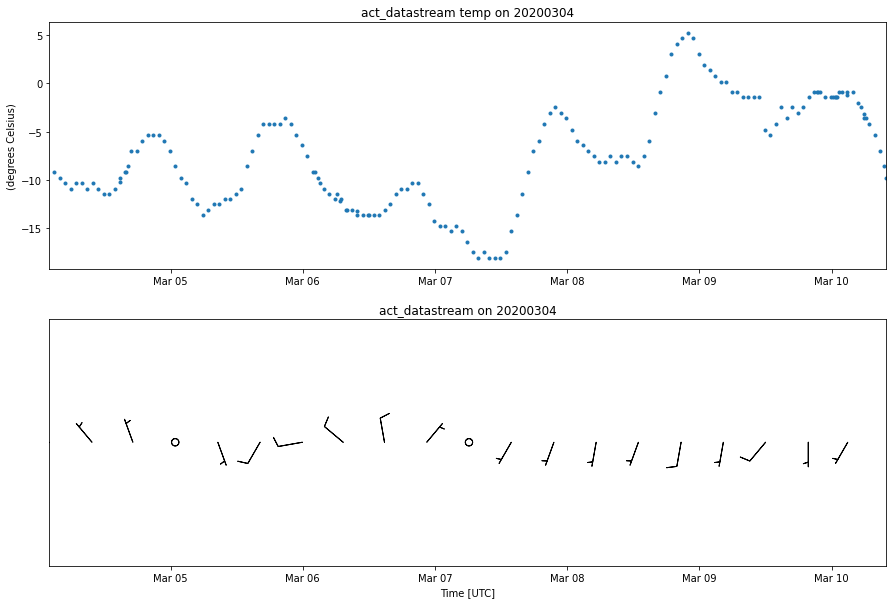

In [29]:
from datetime import datetime

import matplotlib.pyplot as plt

import act

time_window = [datetime(2020, 3, 4, 2, 0), datetime(2020, 3, 10, 10, 0)]
station = 'KORD'
my_asoses = act.discovery.get_asos(time_window, station='ORD')

display = act.plotting.TimeSeriesDisplay(my_asoses['ORD'], subplot_shape=(2,), figsize=(15, 10))
display.plot('temp', subplot_index=(0,))
display.plot_barbs_from_u_v(u_field='u', v_field='v', subplot_index=(1,))
display.axes[1].set_ylim([0, 2])
plt.show()

# Plot ICARTT Formatted Files

This example shows how to read and display International Consortium for Atmospheric Research on Transport and Transformation (ICARTT) file format standards V2.0

Author: Joe O’Brien

In [ ]:
# !pip install ICARTT    # I tried this, was installed but does not work

import matplotlib.pyplot as plt
import numpy as np

import act
from act.io.icartt import read_icartt

# Call the read_icartt function, which supports input
# for ICARTT (v2.0) formatted files.
# Example file is ARM Aerial Facility Navigation Data
ds = read_icartt(act.tests.EXAMPLE_AAF_ICARTT)

# Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    ds, ds_name=ds.attrs['_datastream'], subplot_shape=(2,), figsize=(15, 5)
)
# Display the AAF Ambient Temperature
display.plot('ambient_temp', subplot_index=(0,), label='Ambient')
# Display the AAF Dewpoint Temperature
display.plot('dewpoint_temperature', subplot_index=(0,), label='Dewpoint')
# Display the AAF Total Temperature
# (i.e Temperature not corrected for heating due to atmospheric compression)
# Note: Total Temperature >= Ambient (Static) Temperature
display.plot('total_temp', subplot_index=(0,), label='Total')

# Display the AAF Static Air Pressure on the second subplot
display.plot('static_pressure', subplot_index=(1,))
# Include legend to identify AAF Temperatures
plt.legend(loc='lower left')
# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

# Plot winds and relative humidity from sounding data

This is an example of how to display wind rose and barb timeseries from multiple days worth of sounding data.

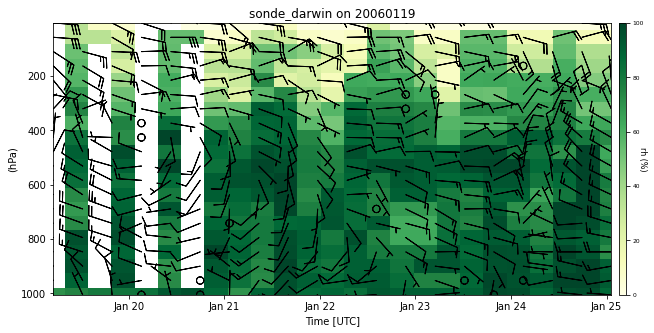

In [49]:
from matplotlib import pyplot as plt

import act

sonde_ds = act.io.armfiles.read_netcdf(act.tests.sample_files.EXAMPLE_TWP_SONDE_WILDCARD)

BarbDisplay = act.plotting.TimeSeriesDisplay({'sonde_darwin': sonde_ds}, figsize=(10, 5))
BarbDisplay.plot_time_height_xsection_from_1d_data(
    'rh', 'pres', cmap='YlGn', vmin=0, vmax=100, num_time_periods=25
)
BarbDisplay.plot_barbs_from_spd_dir('wspd', 'deg', 'pres', num_barbs_x=20)
plt.show()

# NEON Data

This example shows how to download data from NEON and ARM 2m surface meteorology stations on the North Slope and plot them

In [50]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

import act

# Place your username and token here
username = os.getenv('ARM_USERNAME')
token = os.getenv('ARM_PASSWORD')

if token is not None and len(token) > 0:
    # Download ARM data if a username/token are set
    files = act.discovery.download_data(username, token, 'nsametC1.b1', '2022-10-01', '2022-10-07')
    ds = act.io.armfiles.read_netcdf(files)

    # Download NEON Data
    # NEON sites can be found through the NEON website
    # https://www.neonscience.org/field-sites/explore-field-sites
    site_code = 'BARR'
    product_code = 'DP1.00002.001'
    result = act.discovery.get_neon.download_neon_data(site_code, product_code, '2022-10')

    # A number of files are downloaded and further explained in the readme file that's downloaded.
    # These are the files we will need for reading 1 minute NEON data
    file = glob.glob(os.path.join(
        '.',
        'BARR_DP1.00002.001',
        'NEON.D18.BARR.DP1.00002.001.000.010.001.SAAT_1min.2022-10.expanded.*.csv',
    ))
    variable_file = glob.glob(os.path.join(
        '.', 'BARR_DP1.00002.001', 'NEON.D18.BARR.DP1.00002.001.variables.*.csv'
    ))
    position_file = glob.glob(os.path.join(
        '.',
        'BARR_DP1.00002.001',
        'NEON.D18.BARR.DP1.00002.001.sensor_positions.*.csv',
    ))
    # Read in the data using the ACT reader, passing with it the variable and position files
    # for added information in the dataset
    ds2 = act.io.read_neon_csv(file, variable_files=variable_file, position_files=position_file)

    # Plot up the two datasets
    display = act.plotting.TimeSeriesDisplay({'ARM': ds, 'NEON': ds2})
    display.plot('temp_mean', 'ARM', marker=None, label='ARM')
    display.plot('tempSingleMean', 'NEON', marker=None, label='NEON')
    display.day_night_background('ARM')
    plt.show()